In [1]:
from typing import cast

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_lanes = pd.read_csv(
    "../agv_ns_ros_agv/data/AGV_Map/LaneMap-20241126.csv",
    names="index x_begin y_begin x_end y_end".split(),
    index_col=0,
)
df_lanes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x_begin  5 non-null      float64
 1   y_begin  5 non-null      float64
 2   x_end    5 non-null      float64
 3   y_end    5 non-null      float64
dtypes: float64(4)
memory usage: 200.0 bytes


In [3]:
df_transponders = pd.read_csv(
    "../agv_ns_ros_agv/data/AGV_Map/TransMap-20241126.csv",
    names="index x y lane_1 lane_2".split(),
    index_col=0,
)
df_transponders["x"] = df_transponders["x"] / 1000
df_transponders["y"] = df_transponders["y"] / 1000
df_transponders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 1 to 1020
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1020 non-null   float64
 1   y       1020 non-null   float64
 2   lane_1  1020 non-null   int64  
 3   lane_2  1020 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 39.8 KB


In [4]:
df_unbound_transponders = df_transponders[
    (df_transponders["lane_1"] == 0)
    & (df_transponders["lane_2"] == 0)
]
df_unbound_transponders

,x,y,lane_1,lane_2
index,,,,
1,529.500,34.5,0,0
2,529.500,36.5,0,0
3,529.500,38.5,0,0
4,529.500,40.5,0,0
5,529.500,42.5,0,0
...,...,...,...,...
1016,816.832,110.5,0,0
1017,816.832,112.5,0,0
1018,816.832,114.5,0,0


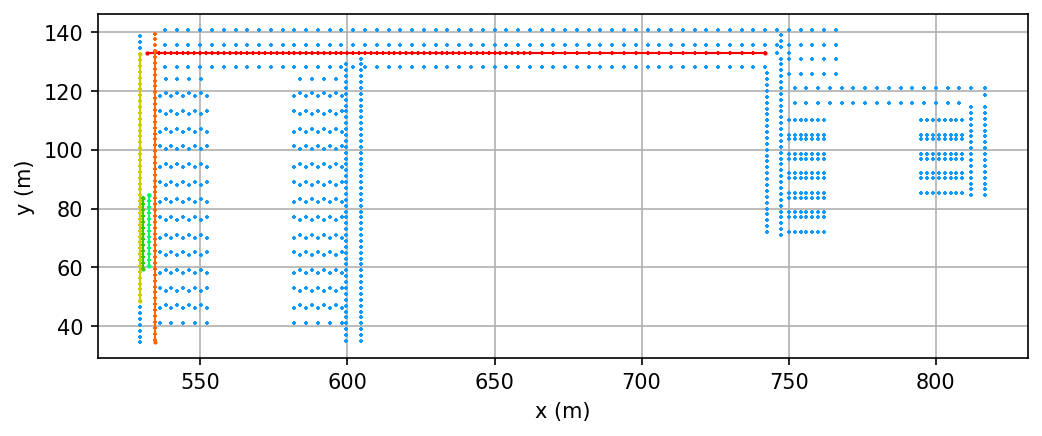

In [5]:
fig = plt.figure(figsize=(8, 6), dpi=150)
fig.set_facecolor("#fff")
ax = fig.add_subplot()

colors: list[str] = []
colors.extend("#f00 #f60 #cc0 #3c0 #0f6 #0cc #19f".split())

n_lanes = len(df_lanes)
n_colors = len(colors)

for index in df_lanes.index:
    lane_index = int(index) - 1
    ax.plot(
        [df_lanes.loc[index, "x_begin"], df_lanes.loc[index, "x_end"]],  # type: ignore
        [df_lanes.loc[index, "y_begin"], df_lanes.loc[index, "y_end"]],  # type: ignore
        ".-",
        color=(colors[lane_index] if n_colors > n_lanes else "blue"),
        lw=1,
        ms=2,
    )

for index in df_transponders.index:
    lane_index = int(
        cast(np.int64, df_transponders.loc[index, "lane_1"])
    ) - 1
    ax.plot(
        cast(np.float64, df_transponders.loc[index, "x"]),
        cast(np.float64, df_transponders.loc[index, "y"]),
        "+",
        color=(colors[lane_index] if n_colors > n_lanes else "red"),
        ms=2,
    )

ax.set(
    xlabel="x (m)",
    ylabel="y (m)",
    # xlim=(500, 600),
    # ylim=(20, 150),
    # xticks=np.arange(525, 826, 25),
    aspect="equal",
)

# for i, index in enumerate(df_unbound_transponders.index):
#     ax.plot(
#         df_unbound_transponders.loc[index, "x"],  # type: ignore
#         df_unbound_transponders.loc[index, "y"],  # type: ignore
#         "x",
#         color="cyan",
#         ms=5,
#         label=("unbound transponder(s)" if i == 0 else None),
#     )

# ax.legend()
ax.grid()